# This is a  Heart Disease Prediction Project
We are going to predict whether someone has heart disease or not

# 1. Problem Definition
    Based on the data, we are going to predict if someone has heart disease or not

# 2. Data
    We have already loaded the data onto our project.

# 3. Evaluate
    We need to make sure that we get at least 95% accuracy in initial stages.

# 4. Features
- age: The age of the patient.
- sex: The gender of the patient. (1 = male, 0 = female).
- cp: Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
- trestbps: Resting blood pressure in mmHg.
- chol: Serum Cholestero in mg/dl.
- fbs: Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
- restecg: Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
- thalach: Max heart rate achieved.
- exang: Exercise induced angina (1 = yes, 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
- ca: Number of major vessels (0–3) colored by flourosopy.
- thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
- target: Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

# Importing Tools and Libraries

In [28]:
# Importing libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing models for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# importing libraries for evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

# Heart Disease Gender Wise

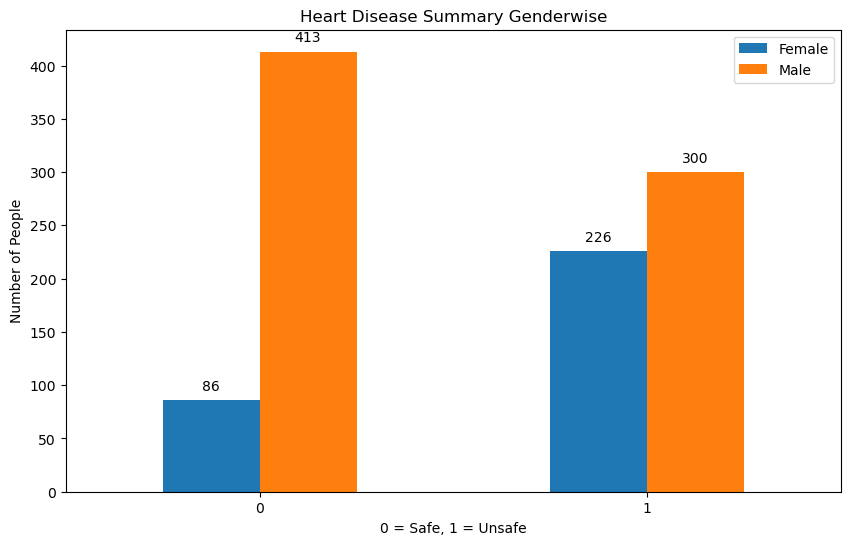

In [34]:

ax = pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6))

# Add annotations for target values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set title, labels, legend, and rotation
plt.title('Heart Disease Summary Genderwise')
plt.xlabel('0 = Safe, 1 = Unsafe')
plt.ylabel('Number of People')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

plt.savefig('heart_disease_summary.png')
plt.show()

# Age vs Heart Rate with respect to heart disease

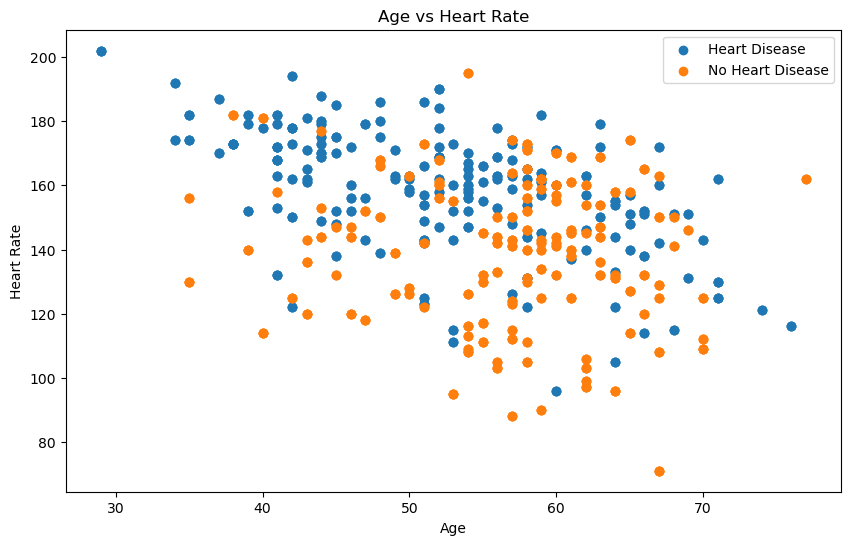

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1])
plt.scatter(df.age[df.target==0], df.thalach[df.target==0])

plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease'])

plt.savefig('age_vs_heartrate.png')
plt.show()

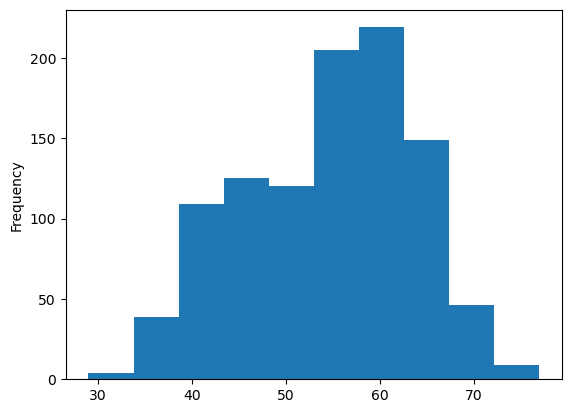

In [11]:
df.age.plot.hist();

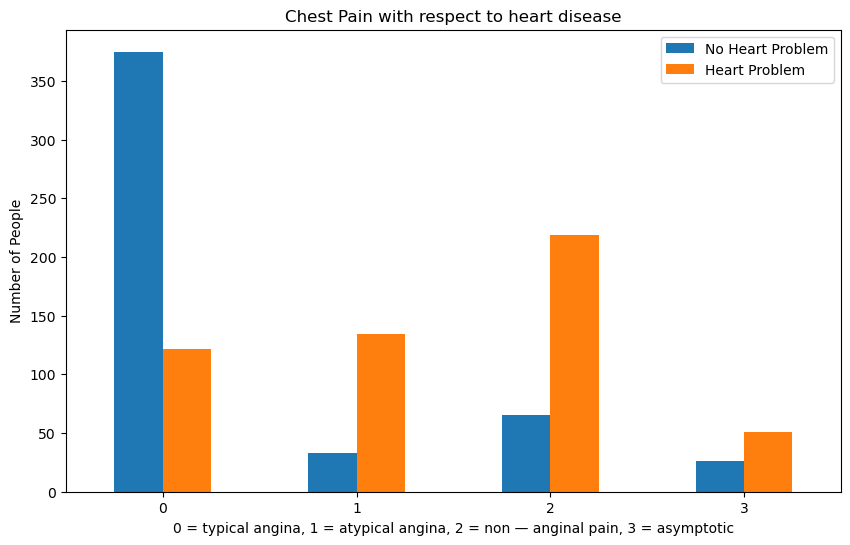

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6))
plt.title('Chest Pain with respect to heart disease')
plt.xlabel('0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(['No Heart Problem', 'Heart Problem'])

# Correlation Matrix

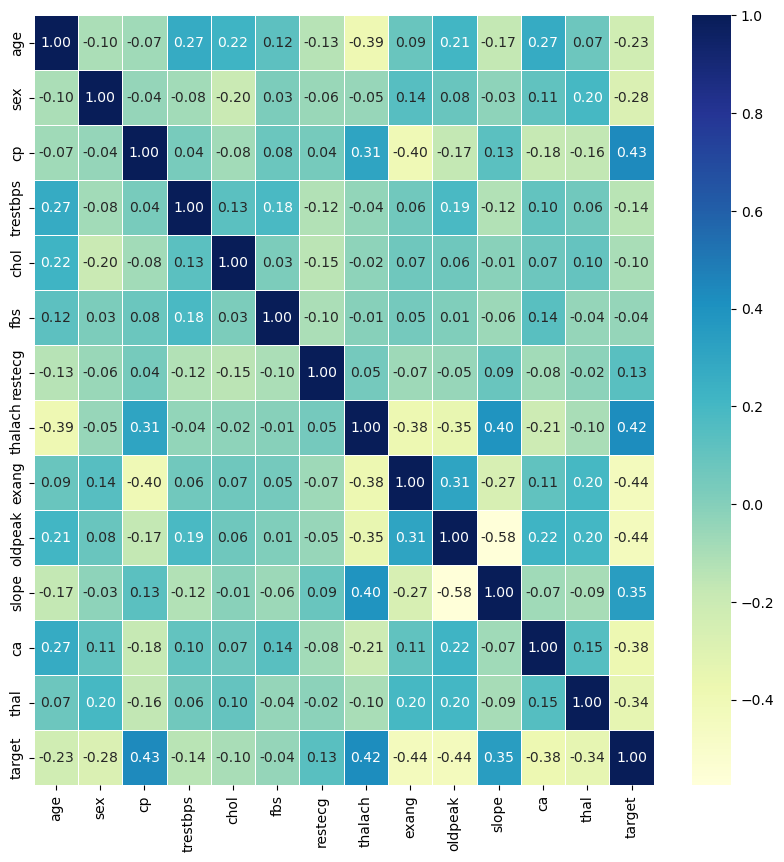

In [7]:
cor_map = df.corr()
home, room = plt.subplots(figsize=(10,10))
room = sns.heatmap(data=cor_map,
                   annot=True,
                   linewidths=0.5,
                   fmt="0.2f",
                   cmap="YlGnBu");
plt.show()


# 5. Modelling

In [3]:
# splitting data into features and labels
x = df.drop("target", axis=1)
y = df["target"]

In [4]:
# using random seed, so that the results stay the same
np.random.seed(1)
# splitting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Models we are going to use
- K-Nearest Neighbors Classifier
- Random Forest Classifier
- Logistic Regression

In [5]:
# Putting all the models into a dictionary
models = {"K-Nearest": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Logistic Regression": LogisticRegression()}

# Creating a function to fit and evaluate the models
def fit_and_evaluate(models, x_train, x_test, y_train, y_test):
    np.random.seed(2)
    # A dictionary to store the scores of all the models
    model_score = {}
    # Looping through each model and fitting and evaluating
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name] = model.score(x_test, y_test)

    return model_score

In [6]:
model_scores = fit_and_evaluate(models=models, 
                                x_train=x_train, 
                                x_test=x_test, 
                                y_train=y_train, 
                                y_test=y_test)
model_scores

C:\Users\abz\OneDrive\Desktop\machine_learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'K-Nearest': 0.7219512195121951,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8097560975609757}

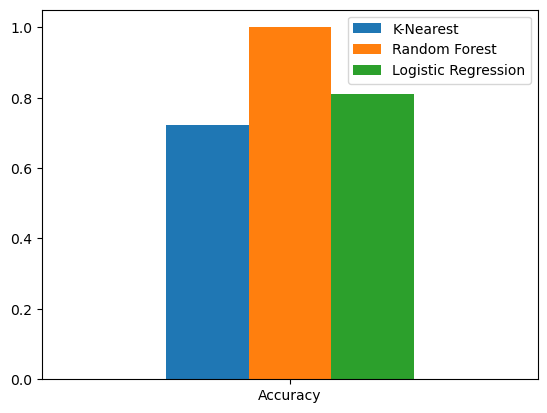

In [23]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.plot(kind='bar')
plt.xticks(rotation=0)
plt.savefig('model_comparison.png')
plt.show()

# 6.  Improving and tuning models
Methods used for all classification models
- Hyperparameter tuning
- Features improving

Advanced Methods for evaluation
- Confusion Matrix
- Cross Validation
- Precision
- Recall
- f1
- Classification Report
- ROC Curve

In [7]:
# tuning hyperparameters for K-Neighbors model
train_score = []
test_score = []

KNN = KNeighborsClassifier()
for i in range(1, 30):
    KNN.set_params(n_neighbors = i)
    KNN.fit(x_train, y_train)
    train_score.append(KNN.score(x_train, y_train)) 
    test_score.append(KNN.score(x_test, y_test))



In [27]:
train_score

[1.0,
 0.9939024390243902,
 0.9914634146341463,
 0.9402439024390243,
 0.9024390243902439,
 0.8317073170731707,
 0.7951219512195122,
 0.7878048780487805,
 0.7817073170731708,
 0.7792682926829269,
 0.7731707317073171,
 0.7682926829268293,
 0.7573170731707317,
 0.7609756097560976,
 0.7585365853658537,
 0.7597560975609756,
 0.7585365853658537,
 0.7695121951219512,
 0.7548780487804878,
 0.7524390243902439,
 0.7573170731707317,
 0.7548780487804878,
 0.7378048780487805,
 0.7475609756097561,
 0.7365853658536585,
 0.7219512195121951,
 0.7280487804878049,
 0.723170731707317,
 0.725609756097561]

In [28]:
test_score

[1.0,
 0.9512195121951219,
 0.9317073170731708,
 0.8292682926829268,
 0.7219512195121951,
 0.7414634146341463,
 0.7170731707317073,
 0.7170731707317073,
 0.7365853658536585,
 0.7268292682926829,
 0.7121951219512195,
 0.7170731707317073,
 0.6926829268292682,
 0.7268292682926829,
 0.7268292682926829,
 0.7414634146341463,
 0.7170731707317073,
 0.7317073170731707,
 0.697560975609756,
 0.7024390243902439,
 0.7268292682926829,
 0.7268292682926829,
 0.7170731707317073,
 0.7268292682926829,
 0.7170731707317073,
 0.697560975609756,
 0.6878048780487804,
 0.6780487804878049,
 0.6731707317073171]

Maximum Accuracy Achieved using K-Neighbors = 100.00%


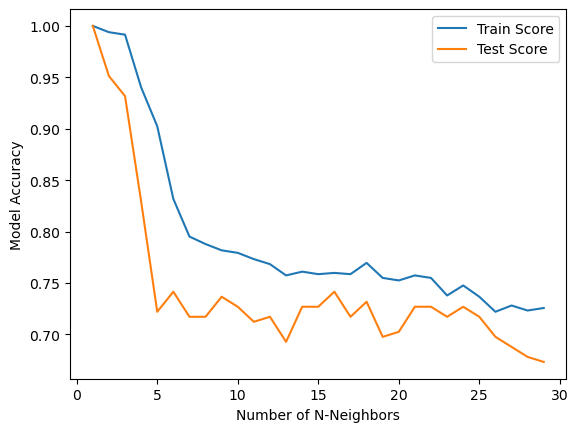

In [32]:
plt.plot(range(1,30), train_score, label='Train Score')
plt.plot(range(1,30), test_score, label='Test Score')
plt.xlabel('Number of N-Neighbors')
plt.ylabel('Model Accuracy')
plt.legend()
print(f"Maximum Accuracy Achieved using K-Neighbors = {max(test_score) * 100:0.2f}%")

# Hyperparameter tuning of LogisticRegression and RandomForest using Randomized Search CV

In [9]:
#dictionary for different tuning parameters
LR_para = {"C": np.logspace(-4,4,20),
           "solver": ["liblinear"]}

RFC_para = {"n_estimators": np.arange(10, 1600, 100),
           "max_depth": [None, 3, 5, 6, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [10]:
# Tuning Logistic Regression using RSCV
np.random.seed(2)
LR = RandomizedSearchCV(LogisticRegression(),
                       param_distributions = LR_para,
                       cv = 5,
                       n_iter = 20,
                       verbose = True)
LR.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [11]:
LR.score(x_test, y_test)

0.8195121951219512

In [12]:
# Best hyperparameters for Logistics Regression model
LR.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [13]:
# Tuning Random Forest Classifier using RSCV
np.random.seed(2)
RFC = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions = RFC_para,
                       cv = 5,
                       n_iter = 20,
                       verbose = True)
RFC.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [14]:
RFC.score(x_test, y_test)

0.9853658536585366

In [15]:
RFC.best_params_

{'n_estimators': 1210,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': None}

# Hyperparameter tuning using Grid Search CV

In [16]:
# tuning logistic regression using gscv
np.random.seed(2)
LR_gs = GridSearchCV(LogisticRegression(),
                       param_grid = LR_para,
                       cv = 5,
                       verbose = True)
LR_gs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [17]:
LR_gs.score(x_test, y_test)

0.8195121951219512

In [18]:
LR_gs.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [20]:
# tuning Random Forest Classifier using gscv
np.random.seed(2)
RFC2_para = {"n_estimators": np.arange(1, 101, 50),
           "max_depth": [None, 3, 50],
           "min_samples_split": np.arange(2, 8, 2),
           "min_samples_leaf": np.arange(1, 7, 2)}
RFC_gs = GridSearchCV(RandomForestClassifier(),
                       param_grid = RFC2_para,
                       cv = 5,
                       verbose = True)
RFC_gs.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [21]:
RFC_gs.score(x_test, y_test)

1.0

In [22]:
RFC_gs.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 51}

# PLotting area under the curve of logistic regression

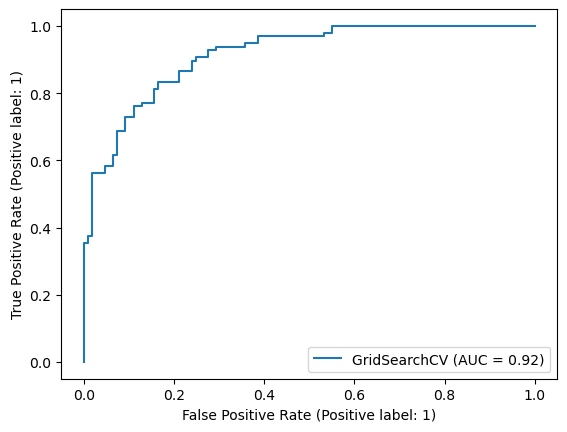

In [29]:
# PLotting area under the curve of logistic regression
y_predict = LR_gs.predict(x_test)
RocCurveDisplay.from_estimator(LR_gs, x_test, y_test)

# PLotting confusion matrix of logistic regression

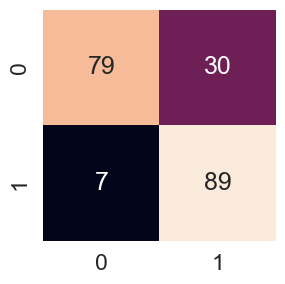

In [31]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrix(y_test, y_predict),
                annot=True,
                cbar=False)


# PLotting classification report of logistic regression

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       109
           1       0.75      0.93      0.83        96

    accuracy                           0.82       205
   macro avg       0.83      0.83      0.82       205
weighted avg       0.84      0.82      0.82       205



# Calculating Cross Validation Accuracy, Precision, Recall, F1

In [35]:
LR_gs.best_params_
LR = LogisticRegression(C = 0.08858667904100823,
                       solver = "liblinear")

In [36]:
# Cross Validation Accuracy
cv_accuracy = cross_val_score(LR, x, y, cv=7, scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8419132819468296

In [37]:
# Cross Validation Precision
cv_precision = cross_val_score(LR, x, y, cv=7, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8054274459339954

In [38]:
# Cross Validation Recall
cv_recall = cross_val_score(LR, x, y, cv=7, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.912531328320802

In [39]:
# Cross Validation f1-score
cv_f1 = cross_val_score(LR, x, y, cv=7, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8554497800940732

# Visualizing the Cross Validation Metrics

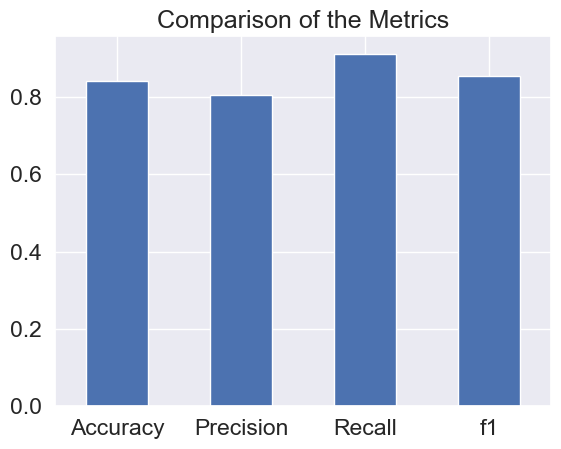

In [42]:
cv_plot = pd.DataFrame({"Accuracy": cv_accuracy,
                       "Precision": cv_precision,
                       "Recall": cv_recall,
                       "f1": cv_f1}, index=[0])
cv_plot.T.plot.bar(title="Comparison of the Metrics", legend=False)
plt.xticks(rotation=0)
plt.savefig("metrics_comparision.png")
plt.show()

# Checking coefficient with respect to target values for features improvement

In [43]:
# Checking coefficient with respect to target values for features improvement
LR.fit(x_train, y_train)
LR.coef_

array([[ 0.00106014, -0.99367205,  0.7317895 , -0.0120268 , -0.00311461,
        -0.06433681,  0.41130404,  0.02871624, -0.65075225, -0.51573926,
         0.30657203, -0.58848591, -0.65385149]])

In [45]:
final_coef = dict(zip(df.columns, list(LR.coef_[0])))
final_coef

{'age': 0.0010601377115293362,
 'sex': -0.9936720468695786,
 'cp': 0.731789500620203,
 'trestbps': -0.012026797882879366,
 'chol': -0.0031146145492530327,
 'fbs': -0.06433681285574133,
 'restecg': 0.4113040440595008,
 'thalach': 0.02871624417418131,
 'exang': -0.650752251579273,
 'oldpeak': -0.5157392559626234,
 'slope': 0.3065720273705047,
 'ca': -0.5884859128783028,
 'thal': -0.6538514877829691}

<Axes: title={'center': 'Importance of features'}>

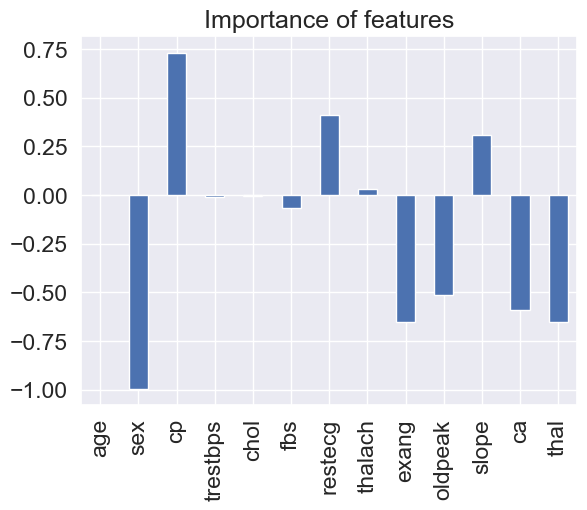

In [46]:
# Values which are closer to zero have no impact on the target value as we can see in the plot below
# Values with higher bar below or above zero have more impact and are more important

features = pd.DataFrame(final_coef, index=[0])
features.T.plot.bar(title="Importance of features", legend=False)

# Conclusion

We had set 95% accuracy goal and we did meet it using RandomForestClassifier model but we were not able to meet it using LogisticRegression model, so for that we can do some following things:
- Try to get more data
- Try to improve the quality of the data
- Use a different model and see if there is any improvement